### [RQ8] 
Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

1. Can you demonstrate that readers usually rate the longest books as the worst?
2. Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
3. About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
4. It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.
5. Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

In [3]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import zipfile
import warnings
from scipy.stats import fisher_exact
import numpy as np
import functions

In [ ]:
data_path = "F:/adm/"

#### ad 1.

In [8]:

books_with_30Percent_of_ratings_above_4 = 0
books_with_at_least_one_rating = 0
# load config
books_df = None
processed_rows = 0

chunksize = 2*10**3
nrows = 4*10**3
flag = True

chunks = pd.read_json(os.path.join(*data_path, 'lighter_books' + '.json'), lines=True, chunksize=chunksize, nrows=nrows, dtype={'num_pages':'numeric', 'average_rating':'numeric'})
for chunk in chunks:
    processed_rows += len(chunk)
    chunk = chunk[['average_rating','num_pages']]
    chunk['average_rating'] = pd.to_numeric(chunk['average_rating'], errors='coerce')
    chunk['num_pages'] = pd.to_numeric(chunk['num_pages'], errors='coerce')
    chunk = chunk[ (~chunk['average_rating'].isna()) & (~chunk['num_pages'].isna()) & (chunk['num_pages']>0 & (0 <= chunk['average_rating']) & (chunk['average_rating'] <= 5) )]
    # chunk['average_rating'] = chunk['average_rating']
    chunk['log(num_pages)'] = np.log(chunk['num_pages'])
    if flag:
        books_df = chunk
        flag = False
    else:
        books_df = pd.concat([books_df, chunk], axis=0)
    print(processed_rows) 

books_df.plot.scatter(x='average_rating', y='log(num_pages)', alpha = 0.3)

NameError: name 'data_path' is not defined

In [3]:
books_head[['average_rating','num_pages']]

,average_rating,num_pages
0,4.50,870
1,4.48,309
2,4.43,352
3,4.57,435
4,4.56,734
...,...,...
9994,3.93,224
9995,4.11,
9996,3.24,208
9997,3.40,188


c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

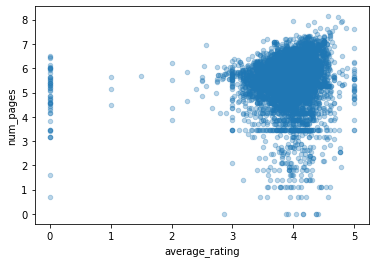

#### ad 2. 
Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [5]:
set(books_head['language'])

{'',
 'ara',
 'dan',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'grc',
 'gre',
 'ita',
 'jpn',
 'lat',
 'mul',
 'mun',
 'nl',
 'por',
 'rus',
 'spa',
 'srp',
 'tur',
 'zho'}

In [6]:
books_head = books_head[ books_head['language'] != "" ]
english_shortcuts = ['eng',"en-"]

In [5]:
books_head['en'] = books_head['language'].apply(lambda entry : entry[:2] == "en" )
grouped_series = books_head[['eng','language','average_rating']].groupby('eng')['average_rating'].apply(list)
grouped_df = pd.DataFrame(grouped_series)
books_df = grouped_df

NameError: name 'books_head' is not defined

In [4]:
from scipy.stats import ks_2samp # kolmogorov-smirnov-two-sample-test
result = ks_2samp(books_df.loc[False,'average_rating'], books_df.loc[True,'average_rating'])

NameError: name 'books_df' is not defined

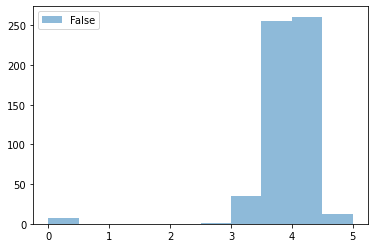

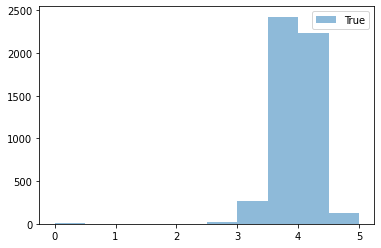

In [8]:
grouped = books_head[['eng','average_rating']].groupby('eng')

for name, group in grouped:
   plt.figure()
   plt.hist(group['average_rating'], alpha=0.5, label=name)
   plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


average_rating                                                
               count      mean       std  min   25%   50%   75%  max
eng                                                                 
False          572.0  3.932150  0.529797  0.0  3.78  3.98  4.20  5.0
True          5083.0  3.954981  0.331891  0.0  3.80  3.98  4.15  5.0

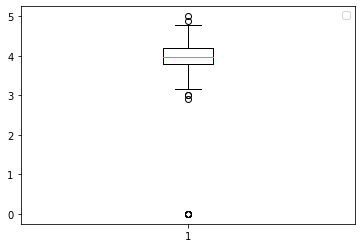

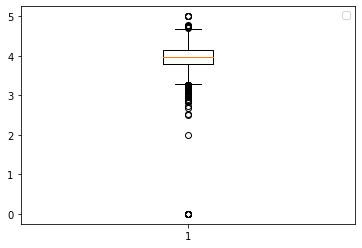

In [10]:
books_head #['text_reviews_count',]

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description,eng
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,6.768493,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...,True
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,5.733341,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...,True
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,5.863631,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...,True
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,6.075346,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A...",True
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,6.598509,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,15498,"Var the Stick (Battle Circle, #2)",None,Piers Anthony,8516,3303257,0552097365,9780552097369,,eng,3.75,5:216|4:256|3:246|2:61|1:15|total:794,794,14,1975-03-21,1972,Mass Market Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Corgi,5.147494,44447,Battle Circle,2,"[{'name': 'to-read', 'count': 278}, {'name': '...",<b>The Scourge of Enmity</b><br /><br />Sol co...,True
9983,15501,"Xanth: The Quest for Magic (Xanth, #1-3)",None,Piers Anthony,8516,17402,034545328X,9780345453280,,en-US,4.06,5:2107|4:1641|3:1179|2:218|1:55|total:5200,5200,32,2002-10-29,1979-01-01,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Del Rey,6.664409,40498,Xanth,1-3,"[{'name': 'to-read', 'count': 953}, {'name': '...","<b>Twenty-five years ago, Piers Anthony fascin...",True
9984,15502,Killobyte,None,Piers Anthony,8516,2353360,0441444253,9780441444250,,en-US,3.57,5:351|4:480|3:573|2:182|1:37|total:1623,1623,51,1994-01-01,1993,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,ACE,5.743003,,,,"[{'name': 'to-read', 'count': 697}, {'name': '...",,True
9991,15509,"Fractal Mode (Mode, #2)",None,Piers Anthony,8516,506769,0441251269,9780441251261,,eng,3.64,5:827|4:1127|3:1162|2:348|1:79|total:3543,3543,33,1992-12-01,1992-01-09,Paperback,,https

In [11]:
filename = "lighter_authors"

books_with_30Percent_of_ratings_above_4 = 0
books_with_at_least_one_rating = 0
# load config
authors_head = None

with open('config.json') as cfg:
    cfg = json.load(cfg)
    path = os.path.join(cfg["datadir"], filename + '.' + "json")
    print(path)
    processed_rows = 0

    chunks = pd.read_json(path, lines=True, chunksize = 10**4, nrows = None, dtype={'num_pages':'numeric', 'average_rating':'numeric'})
    for chunk in chunks:
        authors_head = chunk
        processed_rows += len(chunk)
        print(processed_rows) 
        break

authors_head

F:/adm/lighter_authors.json
9997


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1017,3.20,186,"[21508529, 712955, 16419158, 7414581, 4500450,...","[15788223, 726742, 11484110, 7149486, 4452229,...",93,39921,Jane Donnelly,female,https://images.gr-assets.com/authors/136562765...,Jane Donnelly began earning her living as a wr...,19
9993,1307,3.69,178,"[75696113, 987468, 1250047, 6565216, 5109659, ...","[50671847, 1001978, 1261205, 6377463, 5043061,...",46,39922,Gareth Owen,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Gareth Owen graduated from Bangor University i...,2
9994,106,3.95,25,"[75698507, 75698505, 75698506, 68471, 86652919...","[50673343, 50673341, 50673342, 70661, 55563517...",9,39930,Gavin Peacock,,https://s.gr-assets.com/assets/nophoto/user/u_...,Gavin is associate pastor at Calvary Grace Chu...,1
9995,4719,4.06,128,"[68480, 538871, 25644326, 25644324, 538896, 14...","[70670, 551630, 1438009, 1438010, 551656, 1438...",185,39941,Polybius,male,https://images.gr-assets.com/authors/157674015...,"Polybius (ca. 200–118 BC), Greek Πολύβιος) was...",50


In [12]:
authors_head[['text_reviews_count', 'fans_count']]

,text_reviews_count,fans_count
0,62681,19826
1,84176,16144
2,352,60
3,480,72
4,772,179
...,...,...
9992,186,19
9993,178,2
9994,25,1
9995,128,50


c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='fans_count', ylabel='text_reviews_count'>

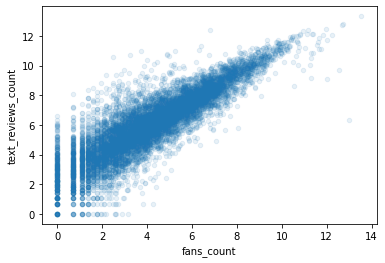

In [13]:
authors_head['text_reviews_count'] = pd.to_numeric(authors_head['text_reviews_count'], errors='coerce')
authors_head['fans_count'] = pd.to_numeric(authors_head['fans_count'], errors='coerce')
authors_head['text_reviews_count'] = np.log(authors_head['text_reviews_count'])
authors_head['fans_count'] = np.log(authors_head['fans_count'])

authors_head.plot.scatter(x='fans_count', y='text_reviews_count', alpha = 0.1)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_set = authors_head[['fans_count','text_reviews_count']]
model_set = model_set[ ~model_set['fans_count'].isna()]
model_set = model_set[ ~model_set['text_reviews_count'].isna()]
model_set = model_set[np.isfinite(model_set).all(1)]


model = LinearRegression()
model.fit(model_set[['fans_count']], model_set['text_reviews_count'])
score = model.score(model_set[['fans_count']], model_set['text_reviews_count'])


print('slope is', model.coef_)
print('intercept is' ,model.intercept_)
# print('residuals is', model.resid )
print('R-squared-Coefficient is', score)





slope is [0.85144437]
intercept is 2.499630105867491
R-squared-Coefficient is 0.7516796190730086


c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
